In [ ]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


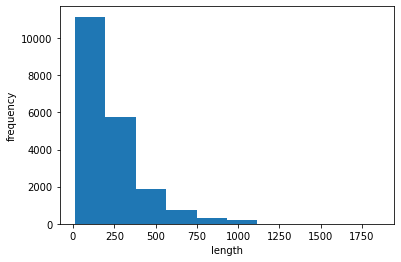

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import SimpleRNN, Dense

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential()
model.add(SimpleRNN(8, input_shape = (100, 500)))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)

model.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = ModelCheckpoint('best_simplernn-model.h5', save_best_only=True)
earlystopping_cb = EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 43s 127ms/step - loss: 0.6953 - accuracy: 0.5164 - val_loss: 0.6883 - val_accuracy: 0.5486
Epoch 2/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6725 - accuracy: 0.5925 - val_loss: 0.6652 - val_accuracy: 0.6084
Epoch 3/100
313/313 [==============================] - 40s 126ms/step - loss: 0.6488 - accuracy: 0.6388 - val_loss: 0.6443 - val_accuracy: 0.6454
Epoch 4/100
313/313 [==============================] - 41s 131ms/step - loss: 0.6253 - accuracy: 0.6760 - val_loss: 0.6234 - val_accuracy: 0.6766
Epoch 5/100
313/313 [==============================] - 39s 126ms/step - loss: 0.6042 - accuracy: 0.7000 - val_loss: 0.6059 - val_accuracy: 0.6982
Epoch 6/100
313/313 [==============================] - 39s 125ms/step - loss: 0.5857 - accuracy: 0.7171 - val_loss: 0.5892 - val_accuracy: 0.7072
Epoch 7/100
313/313 [==============================] - 39s 123ms/step - loss: 0.5685 - accuracy: 0.7326 - val_loss: 0.5736 -

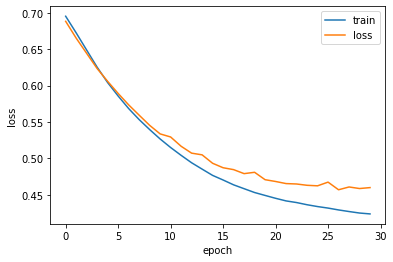

In [ ]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('epoch')
 plt.ylabel('loss')
 plt.legend(['train', 'loss'])
 plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [ ]:
from keras.layers import Embedding
model2 = Sequential()
model2.add(Embedding(500, 16, input_length = 100))
model2.add(SimpleRNN(8))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)

model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = ModelCheckpoint('best_embedding-model.h5', save_best_only=True)
earlystopping_cb = EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 53s 164ms/step - loss: 0.6949 - accuracy: 0.5117 - val_loss: 0.6934 - val_accuracy: 0.5168
Epoch 2/100
313/313 [==============================] - 51s 163ms/step - loss: 0.6867 - accuracy: 0.5523 - val_loss: 0.6852 - val_accuracy: 0.5576
Epoch 3/100
313/313 [==============================] - 51s 163ms/step - loss: 0.6751 - accuracy: 0.6072 - val_loss: 0.6736 - val_accuracy: 0.6174
Epoch 4/100
313/313 [==============================] - 51s 163ms/step - loss: 0.6608 - accuracy: 0.6623 - val_loss: 0.6609 - val_accuracy: 0.6634
Epoch 5/100
313/313 [==============================] - 51s 164ms/step - loss: 0.6463 - accuracy: 0.7042 - val_loss: 0.6481 - val_accuracy: 0.6922
Epoch 6/100
313/313 [==============================] - 50s 160ms/step - loss: 0.6324 - accuracy: 0.7290 - val_loss: 0.6377 - val_accuracy: 0.7104
Epoch 7/100
313/313 [==============================] - 50s 161ms/step - loss: 0.6202 - accuracy: 0.7458 - val_loss: 0.6271 -

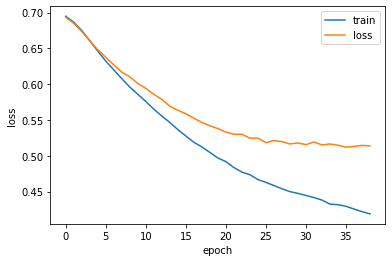

In [ ]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('epoch')
 plt.ylabel('loss')
 plt.legend(['train', 'loss'])
 plt.show()